# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print (lats)
print (lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        print (city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

[-72.28561101  33.91011537  75.90850405 ...  57.41188534   0.37144251
 -63.17897303]
[-121.71138535  116.96195066  161.82280262 ...   66.08507986  104.49759149
   56.60132056]
adamstown
huaibei
bilibino
ust-nera
puerto natales
badger
hithadhoo
blackmans bay
filey
anadyr
isafjordur
egilsstadir
dingwall
tiksi
edinburgh of the seven seas
iqaluit
constantia
mili
thompson
la'ie
pangody
vingt cinq
taiohae
nanchang
bielsk podlaski
sikar
port-aux-francais
carnarvon
port mathurin
minas de marcona
digras
ilulissat
tromso
constitucion
rosario do sul
conde
st. john's
antsiranana
nuuk
cabo san lucas
colonia
kalevala
wenling
ulladulla
rio grande
san luis de la loma
luderitz
nuku'alofa
ribeira grande
nova sintra
bethel
margaret river
hamilton
belmonte
port-gentil
yangshuo
port elizabeth
kapuskasing
albany
bozeman
pocone
waitangi
mangai
grytviken
abu jibeha
puerto carreno
akureyri
avarua
wailua homesteads
valle de la pascua
sotik post
praia da vitoria
dryden
mount isa
puerto ayora
taoudenni
kiama
oneg

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    print (city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        print (city_weather_response)
        city_weather = city_weather_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=adamstown&units=metric
Processing Record 1 of Set 1 | adamstown
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=huaibei&units=metric
Processing Record 2 of Set 1 | huaibei
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=bilibino&units=metric
Processing Record 3 of Set 1 | bilibino
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=ust-nera&units=metric
Processing Record 4 of Set 1 | ust-nera
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=puerto natales&units=metric
Processing Record 5 of Set 1 | puerto natales
<Response [200]>
http://api.openweathermap.org/data/2.5/weather?appid=b5674ad54b0dff294150070a2278d708&q=badge

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.14,76,86,4.65,PN,1715300910
1,huaibei,33.9744,116.7917,19.67,58,13,4.04,CN,1715300910
2,bilibino,68.0546,166.4372,-0.81,88,100,0.92,RU,1715300911
3,ust-nera,64.5667,143.2000,3.59,83,100,1.78,RU,1715300911
4,puerto natales,-51.7236,-72.4875,0.51,93,99,1.31,CL,1715300912


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.14,76,86,4.65,PN,1715300910
1,huaibei,33.9744,116.7917,19.67,58,13,4.04,CN,1715300910
2,bilibino,68.0546,166.4372,-0.81,88,100,0.92,RU,1715300911
3,ust-nera,64.5667,143.2000,3.59,83,100,1.78,RU,1715300911
4,puerto natales,-51.7236,-72.4875,0.51,93,99,1.31,CL,1715300912


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

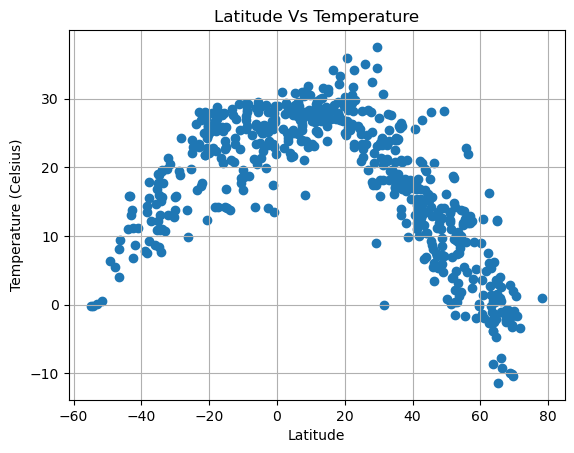

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

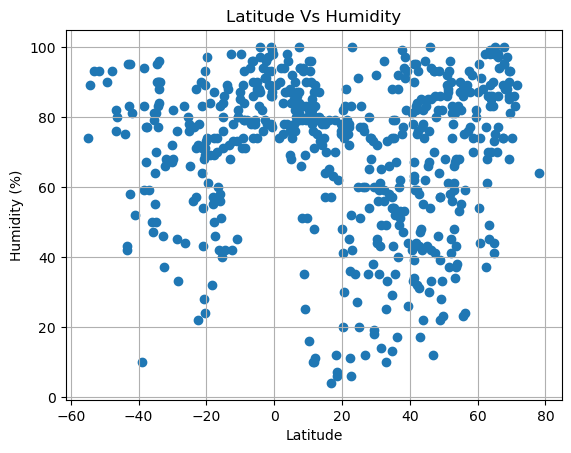

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

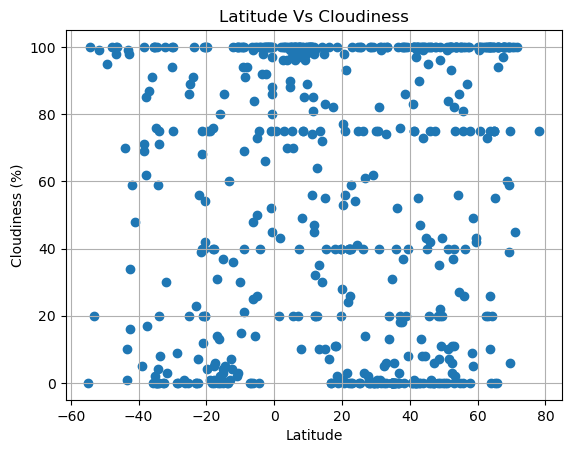

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

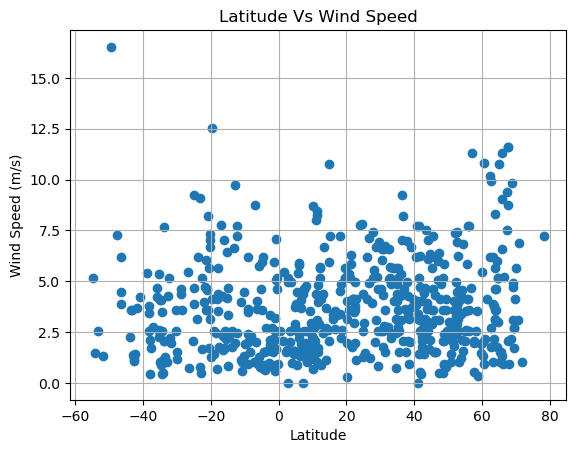

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress_plots(x_values, y_values, x_label, y_label, a_cord_x, a_cord_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line values
    # regress_values = x_values * slope + intercept
    regress_values = [slope * i + intercept for i in x_values]
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # print (line_eq)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(a_cord_x,a_cord_y),fontsize=15,color="red")
    # plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# # Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,huaibei,33.9744,116.7917,19.67,58,13,4.04,CN,1715300910
2,bilibino,68.0546,166.4372,-0.81,88,100,0.92,RU,1715300911
3,ust-nera,64.5667,143.2000,3.59,83,100,1.78,RU,1715300911
5,badger,64.8000,-147.5333,12.22,41,75,5.14,US,1715300912
8,filey,54.2100,-0.2892,13.83,83,56,2.10,GB,1715300914


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.14,76,86,4.65,PN,1715300910
4,puerto natales,-51.7236,-72.4875,0.51,93,99,1.31,CL,1715300912
6,hithadhoo,-0.6000,73.0833,28.93,77,86,4.63,MV,1715300913
7,blackmans bay,-43.0167,147.3167,13.07,95,99,1.39,AU,1715300913
14,edinburgh of the seven seas,-37.0676,-12.3116,12.22,59,87,2.77,SH,1715300917


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8705376087922331


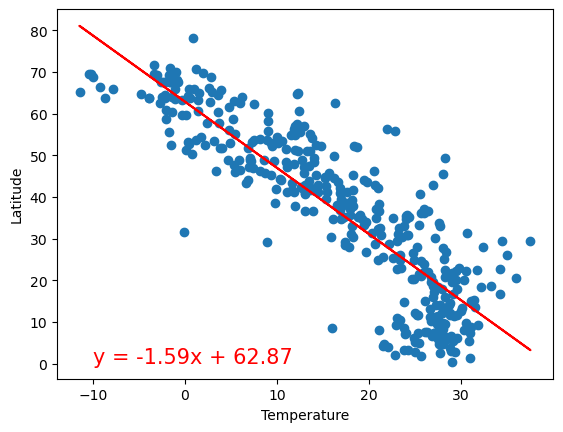

In [15]:
# Linear regression on Northern Hemisphere
linear_regress_plots(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], "Temperature", "Latitude",-10,0)


The r-value is: 0.7478635224913925


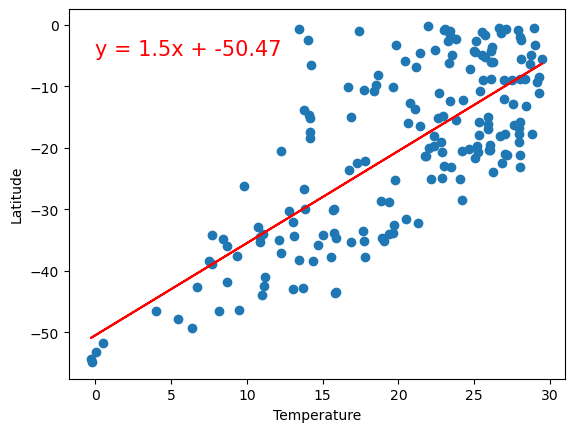

In [16]:
# Linear regression on Southern Hemisphere
linear_regress_plots(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"], "Temperature", "Latitude",0,-5)

### Discussion about the linear relationship:

- #### Northern Hemisphere:
It can be seen that as the temperature increases, the latitude decreases. There is a negative linear correlation between temperature and latitude. This is also indicated by the negative gradient/slope in the equation for the linear regression line. The r_value of -0.8644 tells us that the negative correlation is strong.
This is expected as decreasing latitude in the northern hemisphere means getting close to the equator, therefore getting hotter

- #### Southern Hemisphere:
It can be seen that as the temperature increases, the latitude increases. There is a positive linear correlation between temperature and latitude. This is also indicated by the positive gradient/slope in the equation for the linear regression line. The r_value of 0.7749 tells us that the positive correlation is strong.
This is expected as increasing latitude in the south hemisphere means getting close to the equator, therefore getting hotter.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05568645765182827


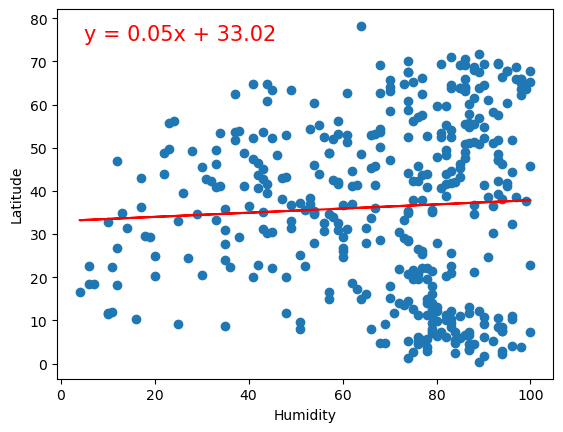

In [17]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Humidity"], northern_hemi_df["Lat"], "Humidity", "Latitude",5,75)

The r-value is: 0.23684043161872345


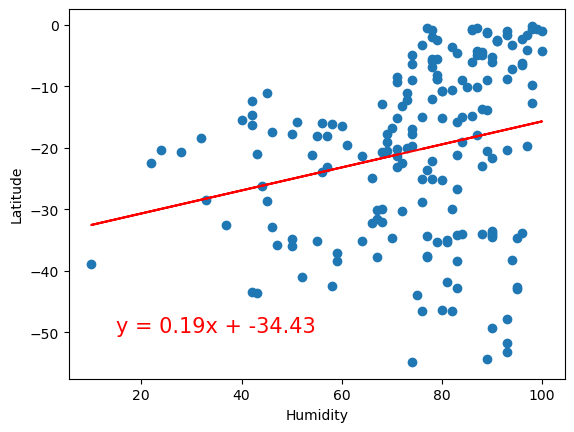

In [18]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Humidity"], southern_hemi_df["Lat"], "Humidity", "Latitude",15,-50)

### Discussion about the linear relationship:

 - #### Northern Hemisphere:
It can be seen that as the humidity increases, the latitude increases by a small amount. That is, there is a weak positive linear correlation between humidity and latitude. This is also indicated by the small positive gradient/slope in the equation for the linear regression line.
The r_value of 0.056 tells us that the positive correlation is very weak.

 - #### Southern Hemisphere:
It can be seen that as the humidity increases, the latitude increases by a small amount. That is, there is a weak positive linear correlation between humidity and latitude. This is also indicated by the small positive gradient/slope in the equation for the linear regression line.
The r_value of 0.237 tells us that the positive correlation is weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.013129746094431086


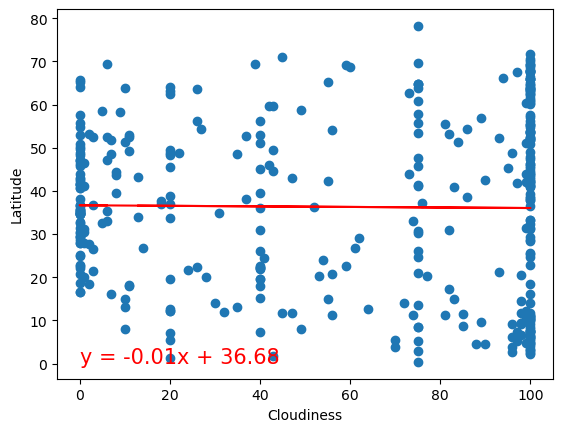

In [19]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"], "Cloudiness", "Latitude",0,0)

The r-value is: 0.12840961531325576


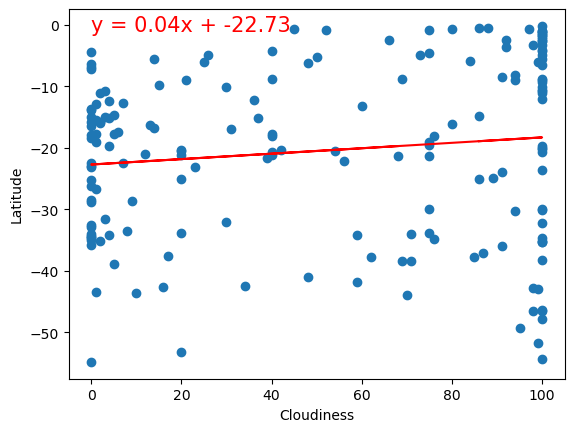

In [20]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"], "Cloudiness", "Latitude",0,-1)

#### Discussion about the linear relationship:

- #### Northern Hemisphere:

It can be seen that as the cloudiness increases, the latitude decreases by a very small amount. That is, there is a very weak negative linear correlation between cloudiness and latitude. This is also indicated by the very small negative gradient/slope in the equation for the linear regression line. The r_value of -0.013 tells us that the negative correlation is very weak.

 - #### Southern Hemisphere:

It can be seen that as the cloudiness increases, the latitude increases by a very small amount. That is, there is a very weak positive linear correlation between cloudiness and latitude. This is also indicated by the very small positive gradient/slope in the equation for the linear regression line. The r_value of 0.128 tells us that the positive correlation is very weak.
 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15795527263335282


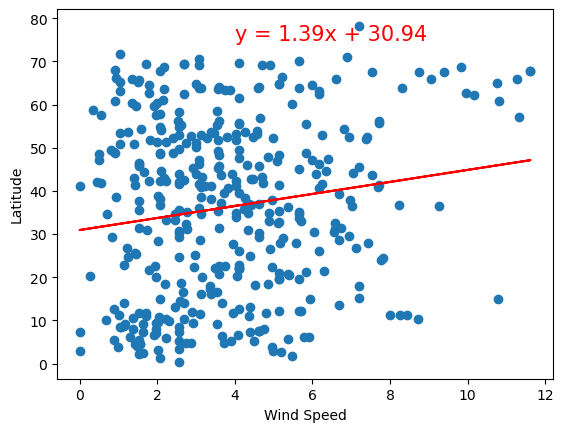

In [21]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"], "Wind Speed", "Latitude",4,75)

The r-value is: -0.09940919790516221


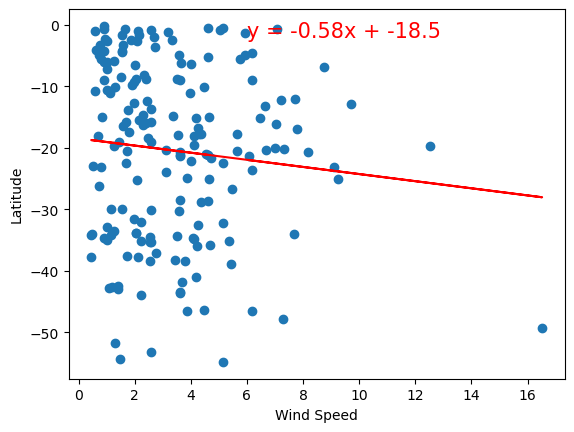

In [22]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"], "Wind Speed", "Latitude",6,-2)

#### Discussion about the linear relationship:

- #### Northern Hemisphere:

It can be seen that as the wind speed increases, the latitude increases by a small amount. That is, there is a weak positive linear correlation between wind speed and latitude. This is also indicated by the small positive gradient/slope in the equation for the linear regression line.
The r_value of 0.158 tells us that the positive linear correlation is very weak.

 - #### Southern Hemisphere:

It can be seen that as the wind speed increases, the latitude decreases by a small amount, although more than in the northern hemisphere. That is, there is a weak negative linear correlation between wind speed and latitude. This is also indicated by the small negative gradient/slope in the equation for the linear regression line. The r_value of -0.099 tells us that the negative correlation is very weak.
 